In [ ]:
!pip install kagglehub

import kagglehub

path = kagglehub.dataset_download("antonygarciag/fall-audio-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/joyngjingru/.cache/kagglehub/datasets/antonygarciag/fall-audio-detection-dataset/versions/5


In [3]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
def extract_features(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_scaled = np.mean(mfcc, axis=1)
    return mfcc_scaled

In [ ]:
def load_dataset(data_dir):
    features = []
    labels = []
    file_metadata = []
    
    for file in os.listdir(data_dir):
        if file.endswith('.wav'):
            file_path = os.path.join(data_dir, file)
            
            parts = file.rstrip('.wav').split('-')
            if len(parts) != 5:
                print(f"Filename {file} does not match expected format; skipping.")
                continue
                
            fold = parts[0]
            random_code = parts[1]
            environment = parts[2]
            sequence = parts[3]
            class_code = parts[4]
            
            label = 1 if class_code == '01' else 0
            
            feat = extract_features(file_path)
            features.append(feat)
            labels.append(label)
            file_metadata.append({
                'filename': file,
                'fold': fold,
                'environment': environment,
                'sequence': sequence,
                'class': class_code
            })
            
    return np.array(features), np.array(labels), file_metadata

data_dir = "<notebook path>/.cache/kagglehub/datasets/antonygarciag/fall-audio-detection-dataset/versions/5"
X, y, metadata = load_dataset(data_dir)

print("Features shape:", X.shape)
print("Labels distribution:", np.unique(y, return_counts=True))
print("Sample metadata:", metadata[0])

Features shape: (950, 13)
Labels distribution: (array([0, 1]), array([475, 475]))
Sample metadata: {'filename': '08-509-00-151-02.wav', 'fold': '08', 'environment': '00', 'sequence': '151', 'class': '02'}


In [6]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (760, 13) (760,)
Test set: (190, 13) (190,)


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=16, 
                    validation_data=(X_test, y_test))

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 1.1947 - val_accuracy: 0.8684 - val_loss: 0.3036
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8887 - loss: 0.2978 - val_accuracy: 0.8474 - val_loss: 0.3266
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8673 - loss: 0.3215 - val_accuracy: 0.8895 - val_loss: 0.2795
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9230 - loss: 0.1928 - val_accuracy: 0.9000 - val_loss: 0.2081
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8955 - loss: 0.2312 - val_accuracy: 0.9474 - val_loss: 0.1725
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.9272 - loss: 0.1782 - val_accuracy: 0.9368 - val_loss: 0.1740
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9395 - loss: 0.1768 - val_accuracy: 0.9316 - val_loss: 0.1732
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.9176 - loss: 0.1969 - val_accuracy: 0.95

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9564 - loss: 0.1216
Test accuracy: 0.9631578922271729


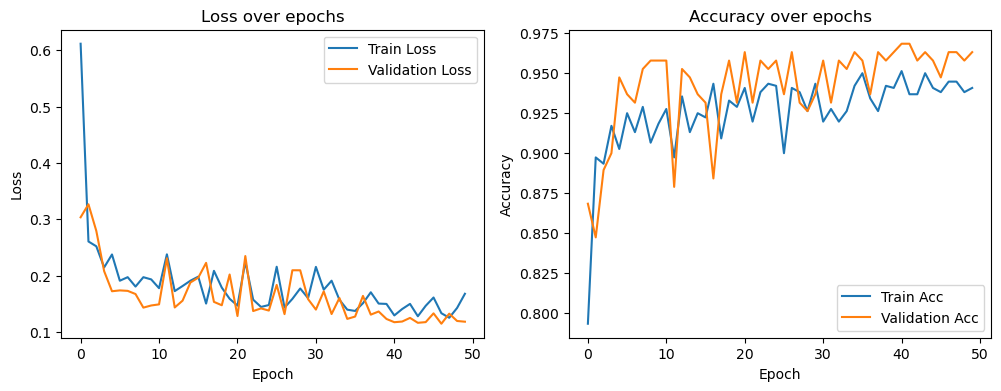

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Validation Acc")
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('fall_detection_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved as fall_detection_model.tflite")

INFO:tensorflow:Assets written to: /var/folders/5j/gq1ms3bs0lsbcnx3d0vmprjc0000gn/T/tmpeb00iguo/assets


INFO:tensorflow:Assets written to: /var/folders/5j/gq1ms3bs0lsbcnx3d0vmprjc0000gn/T/tmpeb00iguo/assets


Saved artifact at '/var/folders/5j/gq1ms3bs0lsbcnx3d0vmprjc0000gn/T/tmpeb00iguo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 13), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  11156386832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11156387984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11156376272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11156386064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11156388560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11156386256: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model saved as fall_detection_model.tflite


W0000 00:00:1744527432.716373  525361 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744527432.716386  525361 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-13 14:57:12.716563: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/5j/gq1ms3bs0lsbcnx3d0vmprjc0000gn/T/tmpeb00iguo
2025-04-13 14:57:12.716825: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-13 14:57:12.716830: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/5j/gq1ms3bs0lsbcnx3d0vmprjc0000gn/T/tmpeb00iguo
I0000 00:00:1744527432.718591  525361 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-13 14:57:12.718897: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-13 14:57:12.730298: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

In [ ]:
def predict_fall(file_path, model, threshold=0.5):
    features = extract_features(file_path)
    features = np.expand_dims(features, axis=0)  
    
    prediction = model.predict(features)
    
    if prediction[0][0] > threshold:
        print("FALL DETECTED")
    else:
        print("No fall detected")

predict_fall("<notebook_path>/.cache/kagglehub/datasets/antonygarciag/fall-audio-detection-dataset/versions/5/10-885-00-281-02.wav", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
No fall detected


In [ ]:
# testing an audio file
predict_fall("<path to testing audio file>.wav", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
No fall detected
